<h1>Coronavirus COVID-19 Tweets</h1>


<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F769452%2F35db2dd68238bfd958efdabebc9fef8f%2Fcovid-19-4961257_1280-e1586986896105.jpg?generation=1595760042647275&alt=media" width="600"></img>


# Introduction


The Dataset we are using here is collected using Twitter API, **tweepy** and Python package.


# Data preparation

## Load packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS

## Load data

In [2]:
tweets_df = pd.read_csv("/kaggle/input/covid19-tweets/covid19_tweets.csv")

# Data exploration


## Glimpse the data

In [3]:
print(f"data shape: {tweets_df.shape}")

data shape: (102601, 13)


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102601 entries, 0 to 102600
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         102601 non-null  object
 1   user_location     81775 non-null   object
 2   user_description  96813 non-null   object
 3   user_created      102601 non-null  object
 4   user_followers    102601 non-null  int64 
 5   user_friends      102601 non-null  int64 
 6   user_favourites   102601 non-null  int64 
 7   user_verified     102601 non-null  bool  
 8   date              102601 non-null  object
 9   text              102601 non-null  object
 10  hashtags          73065 non-null   object
 11  source            102574 non-null  object
 12  is_retweet        102601 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 8.8+ MB


In [5]:
tweets_df.describe()

,user_followers,user_friends,user_favourites
count,1.026010e+05,102601.000000,1.026010e+05
mean,1.018105e+05,2173.201908,1.504107e+04
std,8.027212e+05,9607.486075,4.586419e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.710000e+02,156.000000,2.260000e+02
50%,9.840000e+02,555.000000,1.905000e+03
75%,5.229000e+03,1764.000000,9.897000e+03
max,1.389284e+07,497363.000000,2.047197e+06


In [6]:
tweets_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


### Missing data

In [7]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [8]:
missing_data(tweets_df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,0,20826,5788,0,0,0,0,0,0,0,29536,27,0
Percent,0,20.298,5.64127,0,0,0,0,0,0,0,28.7872,0.0263155,0
Types,object,object,object,object,int64,int64,int64,bool,object,object,object,object,bool


### Unique values

In [9]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [10]:
unique_values(tweets_df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,102601,81775,96813,102601,102601,102601,102601,102601,102601,102601,73065,102574,102601
Uniques,59510,18570,56929,60432,19523,8806,25760,2,76322,102408,31436,514,1


### Most frequent values

In [11]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [12]:
most_frequent_values(tweets_df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,102601,81775,96813,102601,102601,102601,102601,102601,102601,102601,73065,102574,102601
Most frequent item,GlobalPandemic.NET,India,Breaking News & Critical Information to SURVIV...,2010-07-13 21:58:05,0,0,0,False,2020-08-06 16:00:00,"The incompetence of this administration, and t...",['COVID19'],Twitter Web App,False
Frequence,375,2012,375,375,946,1548,2781,89563,26,7,22304,31903,102601
Percent from total,0.365,2.46,0.387,0.365,0.922,1.509,2.71,87.293,0.025,0.007,30.526,31.102,100


## Visualize the data distribution

In [13]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

### User name

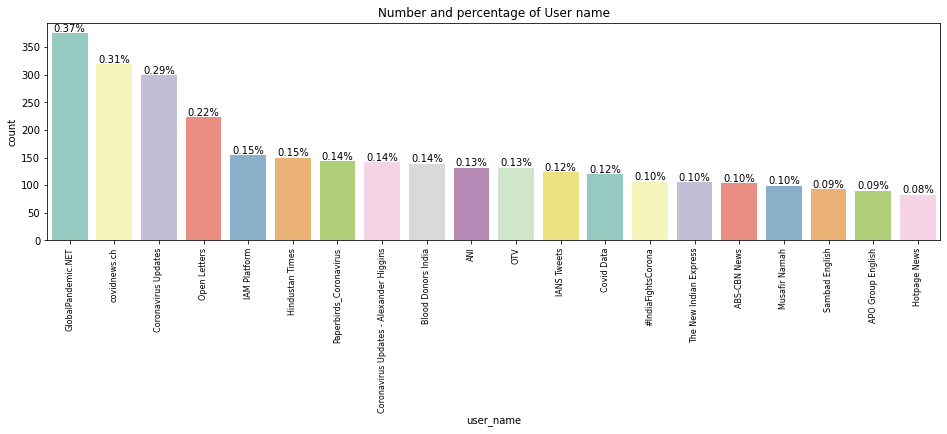

In [14]:
plot_count("user_name", "User name", tweets_df,4)

### User location

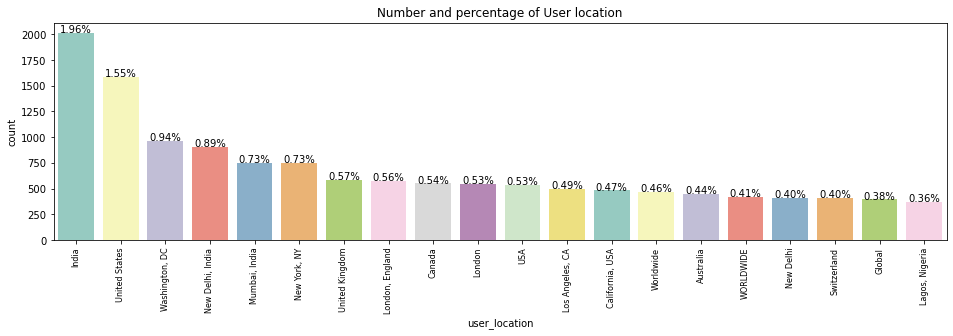

In [15]:
plot_count("user_location", "User location", tweets_df,4)

### Tweet source

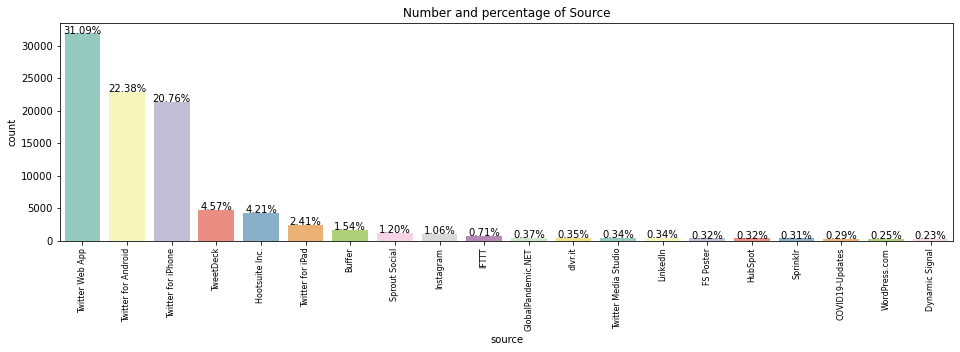

In [16]:
plot_count("source", "Source", tweets_df,4)

In [17]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

### Text wordcloauds

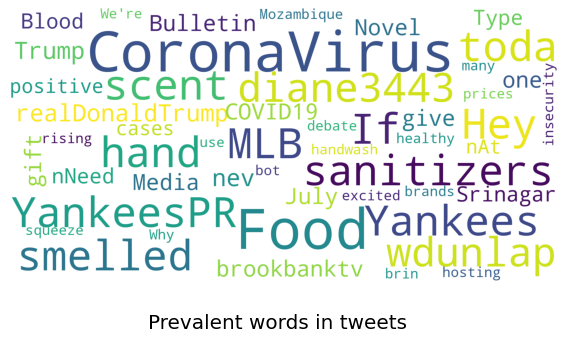

In [18]:
show_wordcloud(tweets_df['text'], title = 'Prevalent words in tweets')

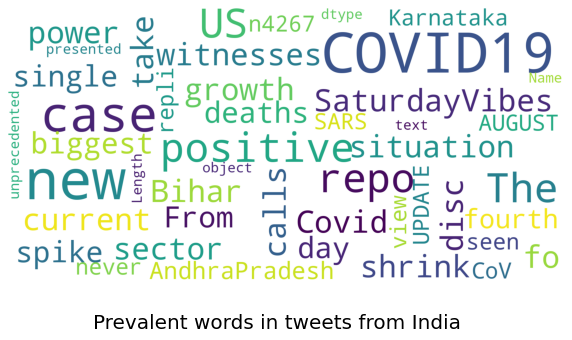

In [19]:
india_df = tweets_df.loc[tweets_df.user_location=="India"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from India')

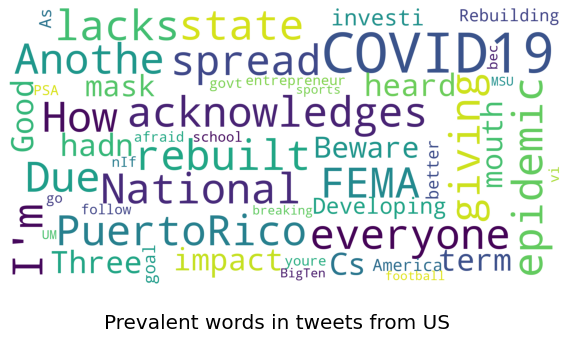

In [20]:
us_df = tweets_df.loc[tweets_df.user_location=="United States"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from US')

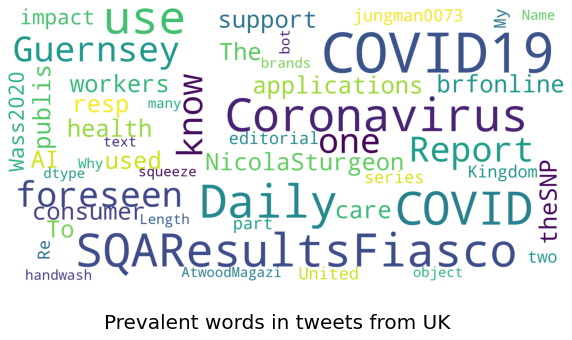

In [21]:
us_df = tweets_df.loc[tweets_df.user_location=="United Kingdom"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from UK')

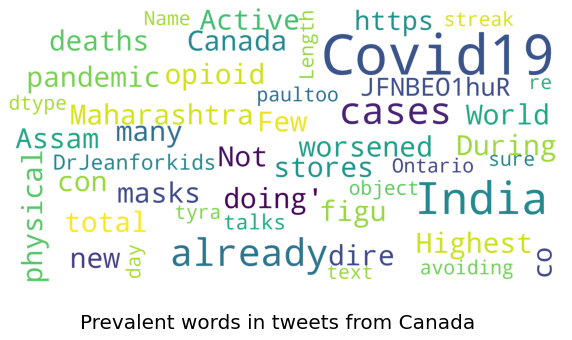

In [22]:
us_df = tweets_df.loc[tweets_df.user_location=="Canada"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from Canada')

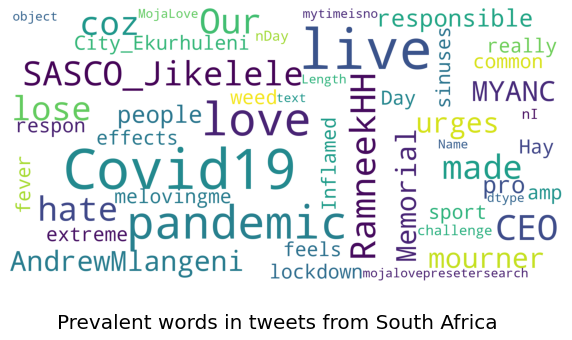

In [23]:
india_df = tweets_df.loc[tweets_df.user_location=="South Africa"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from South Africa')

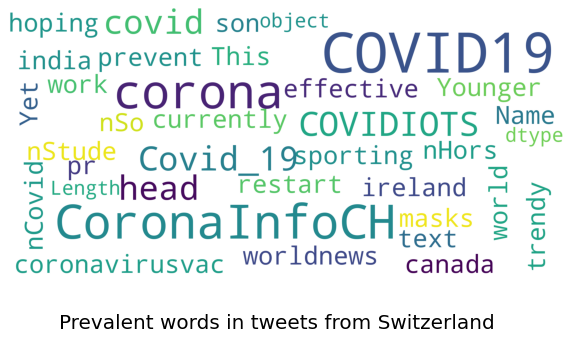

In [24]:
india_df = tweets_df.loc[tweets_df.user_location=="Switzerland"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from Switzerland')

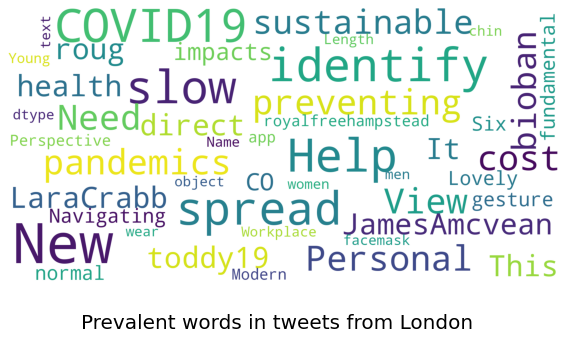

In [25]:
us_df = tweets_df.loc[tweets_df.user_location=="London"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from London')

### Hashtags analysis

In [26]:
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()


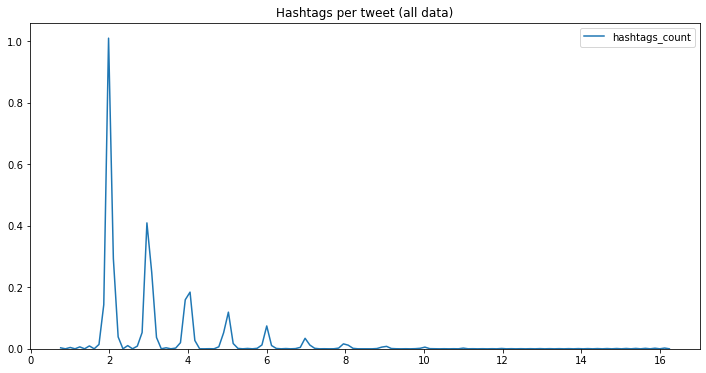

In [27]:
tweets_df['hashtags'] = tweets_df['hashtags'].replace(np.nan, "['None']", regex=True)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.replace('\\N',''))
tweets_df['hashtags_count'] = tweets_df['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', tweets_df)

In [28]:
tweets_df['hashtags_individual'] = tweets_df['hashtags'].apply(lambda x: x.split(','))
from itertools import chain
all_hashtags = set(chain.from_iterable(list(tweets_df['hashtags_individual'])))
print(f"There are totally: {len(all_hashtags)}")

There are totally: 38694


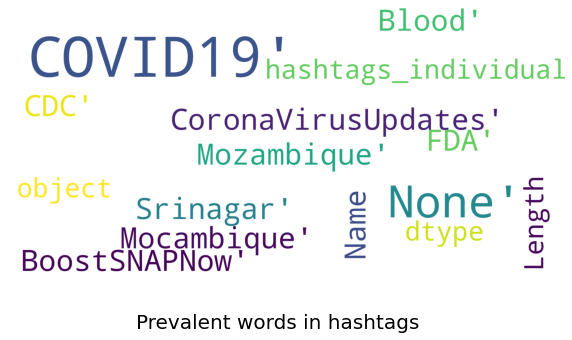

In [29]:
show_wordcloud(tweets_df['hashtags_individual'], title = 'Prevalent words in hashtags')

### Extract country from location

We load the country list from the additional database we added to this Notebook. We also create a `country` column in the original dataset.

In [30]:
country_df = pd.read_csv("../input/iso-country-codes-global/wikipedia-iso-country-codes.csv")

In [31]:
country_df.columns = ["country", "alpha2", "alpha3", "numeric", "iso"]
country_df.head()

,country,alpha2,alpha3,numeric,iso
0,Zimbabwe,ZW,ZWE,716,ISO 3166-2:ZW
1,Zambia,ZM,ZMB,894,ISO 3166-2:ZM
2,Yemen,YE,YEM,887,ISO 3166-2:YE
3,Western Sahara,EH,ESH,732,ISO 3166-2:EH
4,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF


In [32]:
tweets_df['country'] = tweets_df['user_location']

We merge the countries dataset with the tweets dataset.

In [33]:
tweets_df = tweets_df.merge(country_df, on="country")

In [34]:
tweets_df.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,hashtags_count,hashtags_individual,country,alpha2,alpha3,numeric,iso
0,Ms Paz,United States,NaN,2019-09-15 18:10:09,127,974,30217,False,2020-07-25 12:26:21,#FEMA acknowledges #PuertoRico lacks rebuilt h...,"['FEMA', 'PuertoRico', 'COVID19']",Twitter for iPhone,False,3,"[['FEMA', 'PuertoRico', 'COVID19']]",United States,US,USA,840,ISO 3166-2:US
1,Resist2020,United States,#blacklivesmatter #notmypresident #lovetrumpsh...,2010-07-18 20:57:33,89,245,12529,False,2020-07-25 12:22:55,How about everyone can spread #COVID19. Anothe...,['COVID19'],Twitter for iPhone,False,1,[['COVID19']],United States,US,USA,840,ISO 3166-2:US
2,RebeccaCorn,United States,BINARY OPTIONS EXPERT🏅\nFINANCIAL EXPERT AND M...,2020-04-10 10:57:37,35,58,28,False,2020-07-25 12:22:20,Due to the epidemic I'm giving $80 - $1000 to ...,['None'],Twitter for Android,False,1,[['None']],United States,US,USA,840,ISO 3166-2:US
3,OrianaBeaudet DNP RN,United States,VP of Nursing Innovation @ANANursingWorld» Str...,2016-08-15 03:21:55,514,2277,1772,False,2020-07-25 12:20:24,National and state impact of #COVID19 on our e...,['COVID19'],Twitter for iPhone,False,1,[['COVID19']],United States,US,USA,840,ISO 3166-2:US
4,Terry 😷,United States,*BUILD BACK BETTER*,2009-03-21 16:18:08,110,449,2533,False,2020-07-25 12:19:30,Three Cs is a term I hadn’t heard before. Good...,"['GoodAdvice', 'COVID19']",Twitter Web App,False,2,"[['GoodAdvice', 'COVID19']]",United States,US,USA,840,ISO 3166-2:US
5,Steven Petrow,United States,Author of 5 books. Known as The Civilist by so...,2009-09-21 02:21:16,4650,1067,3090,False,2020-07-25 12:19:19,Great to be with @ABC7Robert yesterday on @ABC...,"['SocialDistancing', 'BBQ', 'COVID19', 'COVID19']",Twitter for iPhone,False,4,"[['SocialDistancing', 'BBQ', 'COVID19', 'CO...",United States,US,USA,840,ISO 3166-2:US
6,Lynn Rousseau-Tuitt,United States,"Followed By No one you know, Freelance Writer ...",2017-07-21 19:59:42,7258,7899,21187,False,2020-07-25 12:17:52,My Late Baby Sister left behind three sons. Th...,['COVID19'],Twitter for iPhone,False,1,[['COVID19']],United States,US,USA,840,ISO 3166-2:US
7,ChericeAntoinette,United States,Daien & Houston's Mom🧜🏾‍♀️ Creative Writer🧜🏾‍♀...,2010-07-09 09:40:30,1497,2504,12413,False,2020-07-25 12:13:38,"Children are affected, infected and dying in F...","['ReopenSafely', 'ReopeningSchools', 'health',...",Twitter for Android,False,4,"[['ReopenSafely', 'ReopeningSchools', 'healt...",United States,US,USA,840,ISO 3166-2:US
8,Chris,United States,Jack of all trades... Master of some,2017-06-30 01:14:27,122,122,3098,False,2020-07-25 12:11:23,If schools reopen the spread of #COVID19 will ...,['COVID19'],Twitter for iPhone,False,1,[['COVID19']],United States,US,USA,840,ISO 3166-2:US
9,MMBBDomains,United States,#Political/#election/#business/#news/#arts & #...,2019-11-07 17:07:48,93,66,212,False,2020-07-25 12:11:14,#Hurricane may hit area with major #COVID19 sp...,"['Hurricane', 'COVID19']",Twitter for Android,False,2,"[['Hurricane', 'COVID19']]",United States,US,USA,840,ISO 3166-2:US


In [35]:
tw_add_df = tweets_df.groupby(["country", "iso", "alpha3"])['text'].count().reset_index()
tw_add_df.columns = ["country", "iso", "alpha3", "tweets"]

In [36]:
import plotly.express as px

def plot_map(dd_df, title):
    hover_text = []
    for index, row in dd_df.iterrows():
        hover_text.append((f"country: {row['country']}<br>tweets: {row['tweets']}\
                          <br>country code: {row['iso']}<br>country alpha3: {row['alpha3']}"))
    dd_df['hover_text'] = hover_text

    fig = px.choropleth(dd_df, 
                        locations="alpha3",
                        hover_name='hover_text',
                        color="tweets",
                        projection="natural earth",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        width=900, height=700)
    fig.update_geos(   
        showcoastlines=True, coastlinecolor="DarkBlue",
        showland=True, landcolor="LightGrey",
        showocean=True, oceancolor="LightBlue",
        showlakes=True, lakecolor="Blue",
        showrivers=True, rivercolor="Blue",
        showcountries=True, countrycolor="DarkBlue"
    )
    fig.update_layout(title = title, geo_scope="world")
    fig.show()    

In [37]:
plot_map(tw_add_df, "Tweets per country (where country is specified)")

### Extract date and time features

In [38]:
tweets_df['datedt'] = pd.to_datetime(tweets_df['date'])

In [39]:
tweets_df['year'] = tweets_df['datedt'].dt.year
tweets_df['month'] = tweets_df['datedt'].dt.month
tweets_df['day'] = tweets_df['datedt'].dt.day
tweets_df['dayofweek'] = tweets_df['datedt'].dt.dayofweek
tweets_df['hour'] = tweets_df['datedt'].dt.hour
tweets_df['minute'] = tweets_df['datedt'].dt.minute
tweets_df['dayofyear'] = tweets_df['datedt'].dt.dayofyear
tweets_df['date_only'] = tweets_df['datedt'].dt.date

### Time variation

In [40]:
tweets_agg_df = tweets_df.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [41]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

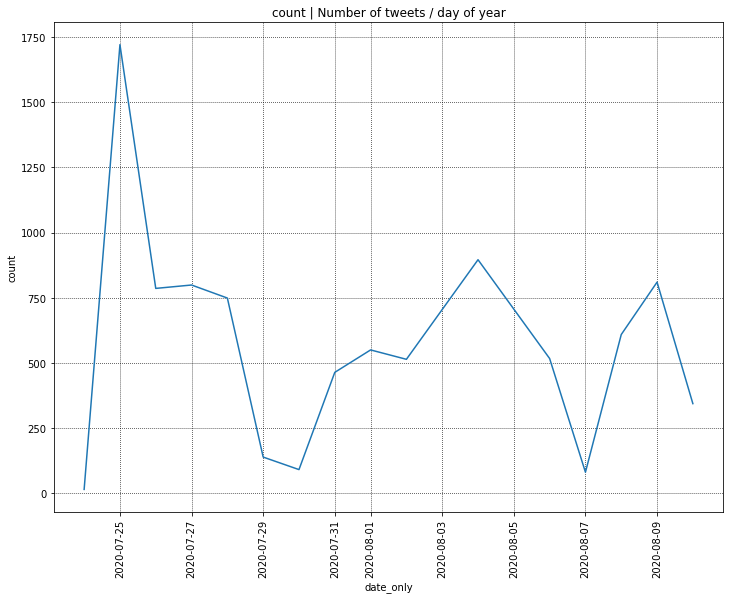

In [42]:
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)

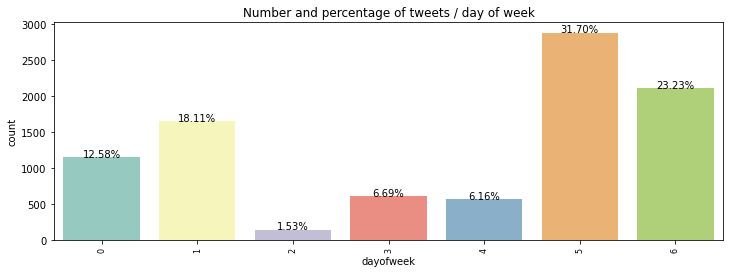

In [43]:
plot_count("dayofweek", "tweets / day of week", tweets_df, size=3, ordered=False)

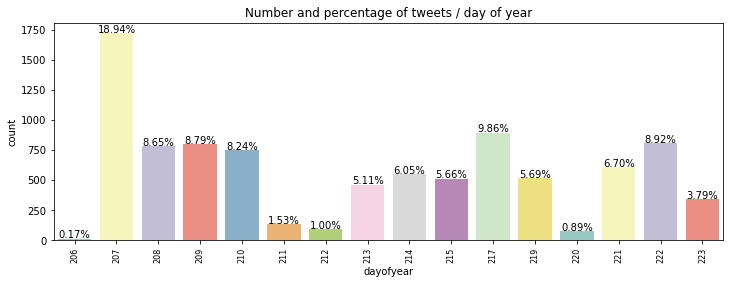

In [44]:
plot_count("dayofyear", "tweets / day of year", tweets_df, size=3, ordered=False)

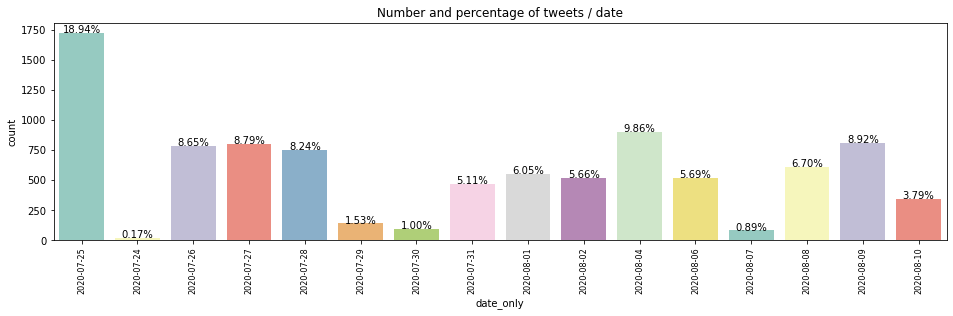

In [45]:
plot_count("date_only", "tweets / date", tweets_df,size=4, ordered=False)

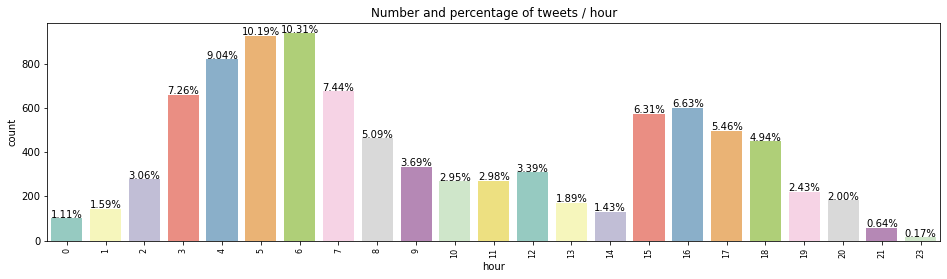

In [46]:
plot_count("hour", "tweets / hour", tweets_df,size=4, ordered=False)

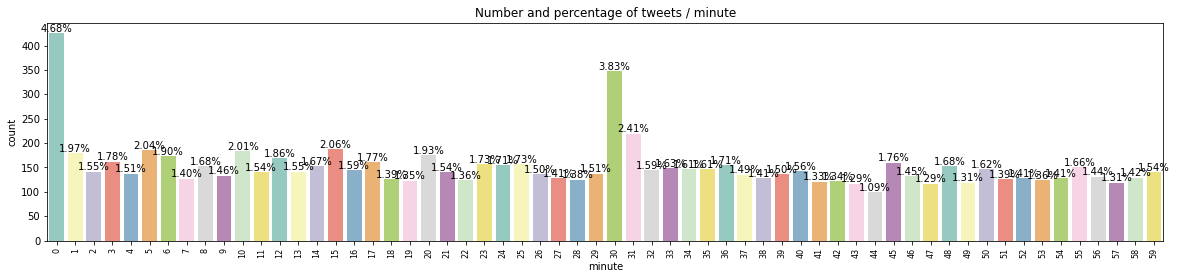

In [47]:
plot_count("minute", "tweets / minute", tweets_df,size=5, ordered=False)